In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [27]:
train = pd.read_csv("preprocess_train_num_all.csv",header = 0)

df_train = pd.DataFrame(train)

cols = list(df_train.columns)

In [28]:
X_train = df_train[cols[1:-1]]
y_train = df_train[cols[-1]]

In [29]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)

In [30]:
clf = LogisticRegression(random_state=0,solver='lbfgs', max_iter=10000).fit(X_train_s, y_train)

In [31]:
y_pred_train = clf.predict(X_train_s)

In [32]:
clf.score(X_train_s, y_train)

0.7328125

C:\Users\elena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        94
           1       0.76      0.79      0.78       152
           2       0.68      0.73      0.70       186
           3       0.64      0.69      0.67       124
           4       0.71      0.37      0.49        46
           5       0.60      0.43      0.50        21
           6       0.79      0.85      0.81        13
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1

    accuracy                           0.73       640
   macro avg       0.71      0.68      0.69       640
weighted avg       0.73      0.73      0.73       640

**************************************************************
Confusion matrix, without normalization
[[ 87   7   0   0   0   0   0   0   0   0]
 [  5 120  27   0   0   0   0   0   0   0]
 [  0  29 136  20   1   0   0   0   0   0]
 [  0   1

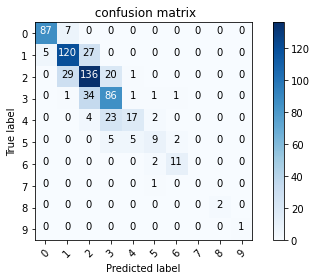

In [33]:
from sklearn.metrics import classification_report

import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

target_names = [ '0','1','2','3','4','5','6','7','8','9']

print(classification_report(y_train,y_pred_train, target_names=target_names))
print ("**************************************************************")

plt.figure()
cnf_matrix = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=False,
                    title=' confusion matrix')

plt.show()

In [34]:
def MAE(y_pred, y_true):
    E = 0
    for i in range(len(y_pred)):
        E += abs(int(y_pred[i])-int(y_true[i]))
    return E/len(y_pred)

In [35]:
MAE(y_pred_train, y_train)

0.290625